# Online Shopping behavior.

## The data set for this assignment is from "Online Shoppers Purchasing Intention Dataset Data Set" https://www.kaggle.com/henrysue/online-shoppers-intention

In [ ]:
## Importing required Libraries
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/4Brain/Midterm/')
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWhHtKRnvwJ_I3xz5LZn-i9RRVdWylek-lm2WUb7BUvd98gHGlaSFMc
Mounted at /content/drive
Data		     ML_for_Computer_Vision.ipynb   project-tensorboard
helper_functions.py  ML_for_Data_Science.ipynb	    __pycache__
logs		     online_shoppers_intention.csv  tpot_baseline_pipeline.py


## Description of data set:
### The data set is "online_shoppers_intention.csv". This data set represents skewed data, such that 84.5% of user journeys did NOT result in a purchase (Revenue=False)
```
a. The dataset consists of 10 numerical and 8 categorical attributes.
b. The 'Revenue' attribute can be used as the class label.
c. "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. 
d. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 
e. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
f. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
g. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page and it represents the percentage that the page was seen in the last session. 
h. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
i. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. 
j. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.
```

# TASK -1
## Data Preprocessing

Discard features which we can't use in models e.g. features which only have one-category in train set and Month as train and test have distinct set of Months.

Further more we are implementing standard-scaling on all numberical features, while categorical features are being encoding via One_hot encoding.

In [3]:
#LOAD DATA AND CORRECT DATA TYPES
url = './online_shoppers_intention.csv'
df = pd.read_csv(url, error_bad_lines=False)
df['Revenue'] = df['Revenue'].map({False: 0, True: 1})
df['Weekend'] = df['Weekend'].map({False: 0, True: 1})

#Correcting data type to object for operating system, browser, region, traffic type  feature as they lack any hierarchy or order:
feature_dtype_obj = ['OperatingSystems','Browser','Region','TrafficType']
df[feature_dtype_obj] = df[feature_dtype_obj].astype(object)

print(df.head())
print(df.info())

   Administrative  Administrative_Duration  ...  Weekend  Revenue
0               0                      0.0  ...        0        0
1               0                      0.0  ...        0        0
2               0                      0.0  ...        0        0
3               0                      0.0  ...        0        0
4               0                      0.0  ...        1        0

[5 rows x 18 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-

In [4]:
#Split Data in Train and Test Set
df_train =  df[df['Month'].isin(['June','Jul','Aug','Sep','Oct','Nov','Dec'])]
df_test  =  df[df['Month'].isin(['Feb','Mar'])]

df.head()

#Train 
X_train = df_train.drop(['Month', 'Revenue','SpecialDay'], axis=1)
X_test  = df_test.drop(['Month', 'Revenue','SpecialDay'], axis=1)

y_train = df_train['Revenue']
y_test = df_test['Revenue']

print(f'Train Distribution = {y_train.mean()}')
print(f'Test Distribution  = {y_test.mean()}')
print('Train and Test Distribution seem very different \n')


#Unique Count for Each Columns
print(X_train.apply(lambda col: len(col.unique())))



# #Non-numeric Features
non_numeric_columns = [col_i for col_i in X_train.columns if X_train[col_i].dtype in ['object']]
# print('')
# print('Object Features')
# for col_i in non_numeric_columns:
#   print(X_train[col_i].value_counts())
#   print('*****')

# #Integer Features
int_columns = [col_i for col_i in X_train.columns if X_train[col_i].dtype in ['int64']]
# print('')
# print('Integer Features')
# for col_i in int_columns:
#   print(X_train[col_i].value_counts())
#   print('*****')

# #Numeric Features 
float_columns = [col_i for col_i in X_train.columns if X_train[col_i].dtype in ['float64']]
# print('')
# print('Integer Features')
# float_columns.append('Revenue')
# float_columns

# sns.pairplot(df_train[float_columns], hue="Revenue") 

print('\nBased on Above - we are discarding SpecialDay from the feature set as it only has 1 unique value in training set.')

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

#X_train.head()


#Pre-Processing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

non_numeric_columns = [col_i for col_i in X_train.columns if X_train[col_i].dtype in ['object']]
float_columns = [col_i for col_i in X_train.columns if X_train[col_i].dtype in ['float64']]
int_columns = [col_i for col_i in X_train.columns if X_train[col_i].dtype in ['int64']]
int_float_cols = float_columns + int_columns

#Standard Scaling for real and integer value variables.
for col_i in int_float_cols:
  #print(col_i)
  scaler = StandardScaler()
  scaler.fit(X_train[[col_i]])

  X_train_scaled = pd.DataFrame(scaler.transform(X_train[[col_i]]))
  X_train[[col_i]]= X_train_scaled

  X_test_scaled = pd.DataFrame(scaler.transform(X_test[[col_i]]))
  X_test[[col_i]]= X_test_scaled

#non_numeric_columns to one-hot encoding
for col_i in non_numeric_columns:
  #print(col_i)
  enc = OneHotEncoder(handle_unknown='ignore')
  enc.fit(X_train[[col_i]])

  X_train_onhot = pd.DataFrame(enc.transform(X_train[[col_i]]).toarray())
  X_train_onhot.columns = enc.get_feature_names([col_i])
  X_train.drop([col_i] ,axis=1, inplace=True)
  X_train= pd.concat([X_train, X_train_onhot ], axis=1)

  X_test_onhot = pd.DataFrame(enc.transform(X_test[[col_i]]).toarray())
  X_test_onhot.columns = enc.get_feature_names([col_i])
  X_test.drop([col_i] ,axis=1, inplace=True)
  X_test= pd.concat([X_test, X_test_onhot ], axis=1)

#list(X_train.columns)
print(X_train.shape)

Train Distribution = 0.19607272727272726
Test Distribution  = 0.09325681492109039
Train and Test Distribution seem very different 

Administrative               27
Administrative_Duration    2504
Informational                14
Informational_Duration      964
ProductRelated              302
ProductRelated_Duration    6046
BounceRates                1438
ExitRates                  3268
PageValues                 1673
OperatingSystems              8
Browser                      12
Region                        9
TrafficType                  15
VisitorType                   3
Weekend                       2
dtype: int64

Based on Above - we are discarding SpecialDay from the feature set as it only has 1 unique value in training set.
(6875, 57)


## Task 1 - a. Feature Correlation
Identify and Eliminate one of the features if feature correlation exceeds by over 0.80.

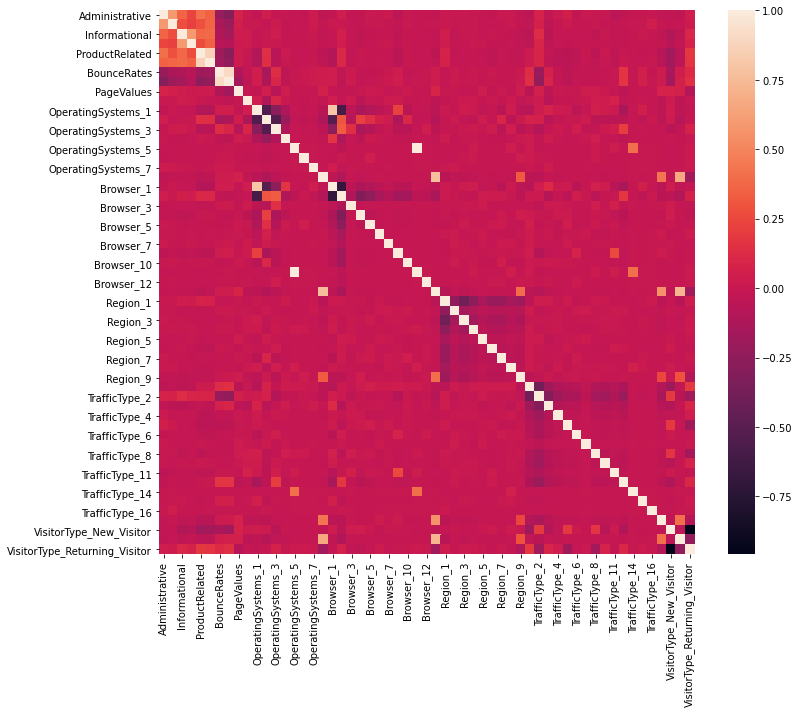

ProductRelated_Duration
ExitRates
Browser_1
Browser_11
Browser_13
VisitorType_Other

The following columns are present in the new data:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues', 'Weekend', 'OperatingSystems_1', 'OperatingSystems_2', 'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5', 'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8', 'Browser_10', 'Browser_12', 'Region_1', 'Region_2', 'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13', 'TrafficType_14', 'TrafficType_15', 'TrafficType_16', 'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Returning_Vi

In [5]:
#Identify High Correlation Features
plt.figure(figsize=(12,10))
cor = X_train.corr(method='pearson')
sns.heatmap(cor)
plt.show()
cor = cor.fillna(value=1)

#Eliminate one of the feature if correlation above 0.70
keep_columns = list(X_train.columns)
for i in range(0,cor.columns.shape[0]-1):
    for j in range(i+1,cor.columns.shape[0]-1):
        if abs(cor.iloc[i,j]) >= 0.70:
            if cor.columns[j] in keep_columns:
                print(cor.columns[j])
                keep_columns.remove(cor.columns[j])
selected_columns = keep_columns
X_train_relevant = X_train[selected_columns]
X_test_relevant  = X_test[selected_columns]

print('')
print('The following columns are present in the new data:')
print(selected_columns)
print(f'The old data had {X_train.shape[1]} features. The new df has {X_train_relevant.shape[1]} features.')

# Task 1 - a.Feature Selection
For feature selection we are using random forrest.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


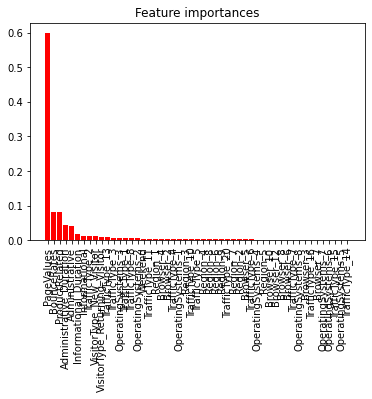

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'Weekend', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'Browser_2', 'Browser_4', 'Region_1', 'Region_3',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_8', 'TrafficType_10', 'TrafficType_11',
       'TrafficType_13', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor'],
      dtype='object')
26


In [6]:
#Feature Selection via Random Forest
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(n_estimators=2000,min_samples_split=0.025, random_state=0, class_weight = 'balanced')
sfm = SelectFromModel(clf, threshold='median')
sfm.fit(X_train_relevant, y_train)

selected_feat = X_train_relevant.columns[(sfm.get_support())]
importances = sfm.estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(X_train_relevant.columns[indices], importances[indices],
       color="r", align="center")
plt.xticks(rotation=90)
plt.show()

print(selected_feat) 
print(len(selected_feat))

X_train_important = X_train[selected_columns]
X_test_important  = X_test[selected_columns]

#Visualize selected features.
Selected features are being visualized via Pair-plots.

In [7]:
#Pairs Plot for selected Features
PairsPlotData = X_train_important.copy(deep=True)
PairsPlotData['Revenue'] = y_train
sns.pairplot(PairsPlotData, hue="Revenue") 

Output hidden; open in https://colab.research.google.com to view.

In [8]:
import warnings
warnings.filterwarnings('ignore')

#Task 1 - b.Model Search And Hyper-parameter Tunning.
For our training set ~20% of customers convert. For the problem its seems we want to be sure that customers are correctly identified as convertable and non-convertable. For our grid serach we will review model optimal for all precision, recall and f1-score. Model of choice will be one with highest f1-score.

In [9]:
#Grid-Search for Logistic Regression:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

tuned_parameters = [{'penalty' : ['l1', 'l2'], 'C' : np.logspace(-4, 4, 20),'solver':['liblinear','saga']},]

clf = GridSearchCV(LogisticRegression(), tuned_parameters, scoring='f1')
clf.fit(X_train_important, y_train)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
  print("%0.4f (+/-%0.04f) for %r" % (mean, std * 2, params))

print('Best Logistic Regression Model')
print(clf.best_params_)
print(clf.best_score_)

0.0000 (+/-0.0000) for {'C': 0.0001, 'penalty': 'l1', 'solver': 'liblinear'}
0.0000 (+/-0.0000) for {'C': 0.0001, 'penalty': 'l1', 'solver': 'saga'}
0.1025 (+/-0.0666) for {'C': 0.0001, 'penalty': 'l2', 'solver': 'liblinear'}
0.0029 (+/-0.0118) for {'C': 0.0001, 'penalty': 'l2', 'solver': 'saga'}
0.0000 (+/-0.0000) for {'C': 0.00026366508987303583, 'penalty': 'l1', 'solver': 'liblinear'}
0.0000 (+/-0.0000) for {'C': 0.00026366508987303583, 'penalty': 'l1', 'solver': 'saga'}
0.1514 (+/-0.0553) for {'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}
0.0190 (+/-0.0148) for {'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'saga'}
0.0000 (+/-0.0000) for {'C': 0.0006951927961775605, 'penalty': 'l1', 'solver': 'liblinear'}
0.0000 (+/-0.0000) for {'C': 0.0006951927961775605, 'penalty': 'l1', 'solver': 'saga'}
0.2311 (+/-0.0636) for {'C': 0.0006951927961775605, 'penalty': 'l2', 'solver': 'liblinear'}
0.1030 (+/-0.0730) for {'C': 0.0006951927961775605, 'penalty': 'l2', 

In [10]:
#Grid-Search for Random Forest:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.forest import RandomForestClassifier

tuned_parameters = [{'n_estimators' : list(range(100,300,100)), 'max_features' : list(range(5,15,5)), 
                     'criterion': ['gini', 'entropy'], 
                     'class_weight': ['balanced', 'balanced_subsample',None]}]

clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, scoring='f1')
clf.fit(X_train_important, y_train)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
  print("%0.4f (+/-%0.04f) for %r" % (mean, std * 2, params))

print('Best Logistic Regression Model')
print(clf.best_params_)
print(clf.best_score_)

0.5273 (+/-0.0999) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 5, 'n_estimators': 100}
0.5284 (+/-0.0981) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 5, 'n_estimators': 200}
0.5455 (+/-0.0804) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 10, 'n_estimators': 100}
0.5567 (+/-0.0899) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 10, 'n_estimators': 200}
0.5286 (+/-0.0986) for {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 5, 'n_estimators': 100}
0.5313 (+/-0.0942) for {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 5, 'n_estimators': 200}
0.5622 (+/-0.0873) for {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 10, 'n_estimators': 100}
0.5635 (+/-0.1046) for {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 10, 'n_estimators': 200}
0.5175 (+/-0.0852) for {'class_weight': 'balanced_subsample', 'criterion': 'gini

In [11]:
#Grid-Search for Linear SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000],'class_weight':['balanced', None]},
#tuned_parameters = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000],'class_weight':['balanced', None]}]
tuned_parameters = [{'C': [1,2, 5, 10, 100],'penalty': ['l2','l1'],'class_weight':['balanced', None]}]

#clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1')
clf = GridSearchCV(LinearSVC(), tuned_parameters, scoring='f1')
clf.fit(X_train_important, y_train)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
  print("%0.4f (+/-%0.04f) for %r" % (mean, std * 2, params))

print('Best Linear Kernel SVM Model')
print(clf.best_params_)
print(clf.best_score_)

0.5844 (+/-0.0571) for {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
nan (+/-nan) for {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1'}
0.4129 (+/-0.0299) for {'C': 1, 'class_weight': None, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1, 'class_weight': None, 'penalty': 'l1'}
0.5821 (+/-0.0536) for {'C': 2, 'class_weight': 'balanced', 'penalty': 'l2'}
nan (+/-nan) for {'C': 2, 'class_weight': 'balanced', 'penalty': 'l1'}
0.4150 (+/-0.0331) for {'C': 2, 'class_weight': None, 'penalty': 'l2'}
nan (+/-nan) for {'C': 2, 'class_weight': None, 'penalty': 'l1'}
0.5845 (+/-0.0524) for {'C': 5, 'class_weight': 'balanced', 'penalty': 'l2'}
nan (+/-nan) for {'C': 5, 'class_weight': 'balanced', 'penalty': 'l1'}
0.4210 (+/-0.0357) for {'C': 5, 'class_weight': None, 'penalty': 'l2'}
nan (+/-nan) for {'C': 5, 'class_weight': None, 'penalty': 'l1'}
0.5873 (+/-0.0377) for {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
nan (+/-nan) for {'C': 10, 'class_weight': 'balanced', 'penalty': 'l1'

In [12]:
#Based on above results Linear SVC is the best classifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

## Results on Test Set
y_true, y_pred = y_test, clf.predict(X_test_important)
print(classification_report(y_true, y_pred))

cmlog = confusion_matrix(y_test, y_pred)
acc   = accuracy(y_test, y_pred)
rec   = recall(y_test, y_pred)
prec  = precision(y_test, y_pred)
f1    = f1_score(y_test, y_pred)

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1896
           1       0.61      0.76      0.68       195

    accuracy                           0.93      2091
   macro avg       0.79      0.86      0.82      2091
weighted avg       0.94      0.93      0.94      2091

Accuracy = 0.9330463892874223, Precision = 0.6131687242798354, Recall = 0.764102564102564, F1-score = 0.6803652968036529
Confusion Matrix is:
[[1802   94]
 [  46  149]]


In [13]:
#Grid-Search for Non-Linear SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

tuned_parameters = [{'kernel': ['rbf'],'gamma': [1e-3, 1e-4, 1e-2],'C': [1, 10, 100, 500,1000],'class_weight':['balanced', None]}]
 
clf = GridSearchCV(SVC(), tuned_parameters, scoring='f1')
clf.fit(X_train_important, y_train)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
  print("%0.4f (+/-%0.04f) for %r" % (mean, std * 2, params))

print('Best RBF Kernel SVM Model')
print(clf.best_params_)
print(clf.best_score_)

0.5685 (+/-0.0532) for {'C': 1, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}
0.4600 (+/-0.0758) for {'C': 1, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'rbf'}
0.6029 (+/-0.0533) for {'C': 1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
0.3804 (+/-0.0502) for {'C': 1, 'class_weight': None, 'gamma': 0.001, 'kernel': 'rbf'}
0.0276 (+/-0.0231) for {'C': 1, 'class_weight': None, 'gamma': 0.0001, 'kernel': 'rbf'}
0.4841 (+/-0.1070) for {'C': 1, 'class_weight': None, 'gamma': 0.01, 'kernel': 'rbf'}
0.6058 (+/-0.0556) for {'C': 10, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}
0.5660 (+/-0.0531) for {'C': 10, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'rbf'}
0.6113 (+/-0.0389) for {'C': 10, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
0.4716 (+/-0.0906) for {'C': 10, 'class_weight': None, 'gamma': 0.001, 'kernel': 'rbf'}
0.3792 (+/-0.0499) for {'C': 10, 'class_weight': None, 'gamma': 0.0001, 'kernel': 'rbf'}
0

In [14]:
#Based on above results NON-Linear SVM
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

## Results on Test Set
y_true, y_pred = y_test, clf.predict(X_test_important)
print(classification_report(y_true, y_pred))

cmlog = confusion_matrix(y_test, y_pred)
acc   = accuracy(y_test, y_pred)
rec   = recall(y_test, y_pred)
prec  = precision(y_test, y_pred)
f1    = f1_score(y_test, y_pred)

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1896
           1       0.67      0.83      0.74       195

    accuracy                           0.95      2091
   macro avg       0.82      0.89      0.85      2091
weighted avg       0.95      0.95      0.95      2091

Accuracy = 0.945480631276901, Precision = 0.6680497925311203, Recall = 0.8256410256410256, F1-score = 0.738532110091743
Confusion Matrix is:
[[1816   80]
 [  34  161]]


#Task 1 - c.Comparison with T-POT Search



In [15]:
#Baseline Results from T-POT
# TPOT for classification
!pip install tpot
from tpot import TPOTClassifier
### START CODE HERE ###
# Instantiate and train a TPOT auto-ML classifier
# Set generations to 5, population_size to 40, and verbosity to 2 (so you can see each generation's performance)
# Use random_state as 42 to get the same results.
tpot = TPOTClassifier(generations=2, population_size=40, verbosity=2, random_state=42)
tpot.fit(X_train_important, y_train)

# Evaluate the classifier on the test data
# By default, the scoring function is accuracy
y_true, y_pred = y_test, tpot.predict(X_test_important)
print(classification_report(y_true, y_pred))


cmlog = confusion_matrix(y_test, y_pred)
acc   = accuracy(y_test, y_pred)
rec   = recall(y_test, y_pred)
prec  = precision(y_test, y_pred)
f1    = f1_score(y_test, y_pred)

# Print the metrics, display the confusion matrix, and visualize the model
print(f'TPOT-Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)

tpot.export('tpot_baseline_pipeline.py')

     |████████████████████████████████| 87 kB 3.1 MB/s 
     |████████████████████████████████| 166.7 MB 11 kB/s 
     |████████████████████████████████| 160 kB 51.3 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11955 sha256=1dd416bcbae2f3a5fb24e5a2f9a918ff5650e3078e27182ec835f79adb59d226
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90



Generation 1 - Current best internal CV score: 0.8609454545454547

Generation 2 - Current best internal CV score: 0.8609454545454547

Best pipeline: XGBClassifier(BernoulliNB(input_matrix, alpha=0.001, fit_prior=False), learning_rate=0.1, max_depth=5, min_child_weight=12, n_estimators=100, n_jobs=1, subsample=0.8500000000000001, verbosity=0)
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1896
           1       0.71      0.68      0.69       195

    accuracy                           0.94      2091
   macro avg       0.84      0.82      0.83      2091
weighted avg       0.94      0.94      0.94      2091

TPOT-Accuracy = 0.9445241511238642, Precision = 0.7135135135135136, Recall = 0.676923076923077, F1-score = 0.6947368421052632
Confusion Matrix is:
[[1843   53]
 [  63  132]]


# Task 1 - Summary: Model Selection, Grid Search and Results
The training data after feature selection has m ~30 features and number of training records n ~ 7K. For this scale of data and features generarlly logistic regression and SVM are advised. 

For the problem we would like to accurate in terms of prediction of right classes an would like a model which is reasonable in both precision and recall and hence **f1-score** is the choice of metric for the most optimal model.

So for our model search three set of Models are selected for this problems. For each we are ran 5 cross-validations sets across set of values of hyper-parameters to find an optimal model.


## Model - 1 Logistic Regression:
*   Params = {{'C': 4.281332398719396, 'penalty': 'l1', 'solver': 'liblinear'}
*   Best F1 Score = 0.448
 
## Model - 2 Random Forest Classifier
*   Params = {'class_weight': None, 'criterion': 'entropy', 'max_features': 10, 'n_estimators': 200}
*   Best F1 Score = 0.567

## Model - 3 Linear SVM [BEST LINEAR MODEL ON CVs]
*   Params = {'C': 2, 'class_weight': 'balanced', 'penalty': 'l2'}
*   Best F1 Score = 0.585

## Results of the best linear model on the test-set
Based on CV results Model 3 - Linear SVM was found as the best model for this problem. Result of that models on thes test set are as follows:

* Accuracy = 0.930 
* Precision = 0.597
* Recall = 0.759
* F1-score = 0.668
* Confusion Matrix is: [[1796  100] [  47  148]]

## Model - 4 Non-Linear SVM [BEST NON-LINEAR MODEL ON CVs]
*   {'C': 1000, 'class_weight': 'balanced', 'gamma': 0.0001, 'kernel': 'rbf'}
*   Best F1 Score = 0.617

## Results of the best non-linear SVM on the test-set 

Based on CV results Model 4 - Linear SVM was found as the best model for this problem. Result of that models on thes test set are as follows:

* Accuracy = 0.945
* Precision = 0.668
* Recall = 0.826
* F1-score = 0.739
* Confusion Matrix is: [[1816   80] [34  161]]

# Comparison with T-POT Grid Search 
TPOT - Pipeline:
* MinMaxScaler(),
* RandomForestClassifier(bootstrap=True, criterion="entropy", max_features=0.6, min_samples_leaf=8, min_samples_split=12, n_estimators=100)

Results on Test-set:
* Accuracy = 0.945, 
* Precision = 0.713,
* Recall = 0.677, 
* F1-score = 0.695
* Confusion Matrix: [[1843   53] [  63  132]]

# Task 2 Clustering
In Task 1 we shortlisted top 15 features in terms o their abilitty to classify sales. 

These features are:



```
(['Administrative', 'Administrative_Duration', 'Informational',
  'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
  'Weekend', 'OperatingSystems_1', 'OperatingSystems_2',
  'OperatingSystems_3', 'Browser_2', 'Browser_4', 'Region_1', 'Region_3',
  'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
  'TrafficType_5', 'TrafficType_8', 'TrafficType_10', 'TrafficType_11',
  'TrafficType_13', 'VisitorType_New_Visitor',
 'VisitorType_Returning_Visitor']
```


For the clustering task we will start from these features and will be using a combinataion of PCA and K-Means. PCA will reduce dimenstion of data and k-means will be executed on the reduced data.

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
url = './online_shoppers_intention.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head()
df['Revenue'] = df['Revenue'].map({False: 0, True: 1})
df['Weekend'] = df['Weekend'].map({False: 0, True: 1})

#Correcting data type to object for operating system, browser, region, traffic type  feature as they lack any hierarchy or order:
feature_dtype_obj = ['OperatingSystems','Browser','Region','TrafficType']
df[feature_dtype_obj] = df[feature_dtype_obj].astype(object)

non_numeric_columns = [col_i for col_i in df.columns if df[col_i].dtype in ['object']]

for col_i in non_numeric_columns:
  #print(col_i)
  enc = OneHotEncoder(handle_unknown='ignore')
  enc.fit(df[[col_i]])

  df_onhot = pd.DataFrame(enc.transform(df[[col_i]]).toarray())
  df_onhot.columns = enc.get_feature_names([col_i])
  df.drop([col_i] ,axis=1, inplace=True)
  df= pd.concat([df, df_onhot ], axis=1)

relevant_columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'Weekend', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'Browser_2', 'Browser_4', 'Region_1', 'Region_3',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_8', 'TrafficType_10', 'TrafficType_11',
       'TrafficType_13', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor']
df_relevant = df[relevant_columns]
 
#Min-Max Sacling of all int64 and float64 features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_relevant[df_relevant.columns] = scaler.fit_transform(df_relevant[df_relevant.columns])
df_relevant.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,Weekend,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,Browser_2,Browser_4,Region_1,Region_3,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_8,TrafficType_10,TrafficType_11,TrafficType_13,VisitorType_New_Visitor,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,0.001418,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.002837,0.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.001418,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.002837,0.25,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.014184,0.10,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# PCA - reduce data dimenstion with PCA such that 90% variance is retained.

Text(0.5, 1.0, 'Number of PCA components needed to explain 90% variance')

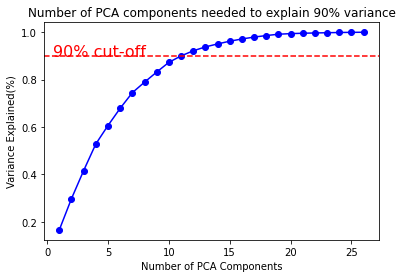

In [18]:
#PCA -  reduce data dimenstion with PCA such that 90% variance is retained.
from sklearn.decomposition import PCA
pca = PCA().fit(df_relevant)

x = np.arange(1, len(pca.explained_variance_ratio_)+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

fig, ax = plt.subplots()
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.text(0.5, 0.90, '90% cut-off', color = 'red', fontsize=16)
plt.xlabel('Number of PCA Components')
plt.ylabel('Variance Explained(%)')
plt.title('Number of PCA components needed to explain 90% variance')

In [19]:
# PCA with 11 components
pca = PCA(n_components=11).fit(df_relevant)
df_red = pca.transform(df_relevant)
print(df_red.shape)

(12330, 11)


In [20]:
pip install -U yellowbrick

     |████████████████████████████████| 271 kB 4.9 MB/s 
  Attempting uninstall: yellowbrick
    Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


# K-Means 

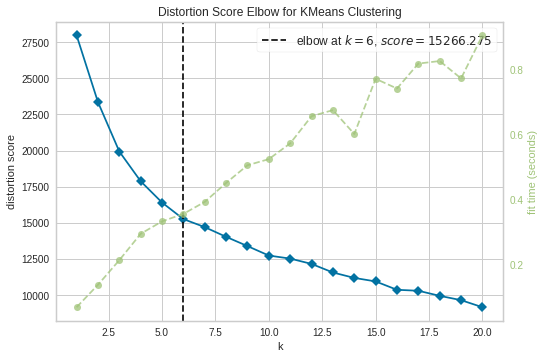

In [24]:
#K_Means
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,21))
visualizer.fit(df_red)
visualizer.show() 

In [26]:
#Optimal Clusters from Elbow Method = 6
clusters = KMeans(n_clusters=6).fit(df_red)
C_vals = clusters.predict(df_red)

df_relevant['Cluster'] = C_vals
df['Cluster'] = C_vals

print('Cluster Stats :')
#print(df[['Cluster', 'Revenue','Weekend','BounceRates','TrafficType_1','TrafficType_2']].groupby(['Cluster']).agg(['mean', 'count']))
print(df[['Cluster', 'Revenue']].groupby(['Cluster']).agg(['mean', 'count']))

#Visualize Clusters
#PairsPlotData = df_relevant.copy(deep=True)
#sns.pairplot(PairsPlotData, hue="Cluster") 


import plotly.express as px
polar=df_relevant.groupby("Cluster").mean().reset_index()
polar=pd.melt(polar,id_vars=["Cluster"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="Cluster", line_close=True,height=800,width=1400)
fig4.show()

Cluster Stats :
          Revenue      
             mean count
Cluster                
0        0.101695  2301
1        0.189461  1689
2        0.115915  1596
3        0.147512  2793
4        0.245482  1328
5        0.164316  2623


## Task 2 - Summary

PCA and K-Mean Clustering 

* As a first-step for clustering we ran PCA which helped reduced dimensionality of data from 26 to 11 while retaining more than 90% variance.

* This was followed by K-Means. To find the right number of clusters, elbow method was utilized which gave the optimal numbers of clusters as 6.

* Summary of 6 clusters -  average conversion rate per cluster:
```
Cluster  Mean Rev *Count*                                                                          
0        0.101695  2301
1        0.189461  1689
2        0.115915  1596
3        0.147512  2793
4        0.245482  1328
5        0.164316  2623
```
* Cluster Characteristics:
  * cluster 0 resulted in a group low converting customers. This group of cusomter are 'Returning Visitor' and tend to primarliy use operating system label 2.
 * cluster 1 resulted in a group lowconverting customers. This group of cusomter are 'Returning Visitor' and tend to primarliy use operating system label 1.
 * cluster 2 resulted in a group high converting customers. This group of cusomter are 'New Visitor' and tend to primarliy use operating system label 1.
 * cluster 3 resulted in a group lowconverting customers. This group of cusomter are 'Returning Visitor' and tend to primarliy use operating system label 3 and broweser labeled 2.
 * cluster 4 resulted in a group low converting customers. This group of cusomter are 'Returning Visitor' and tend to primarliy use operating system label 2 and have traffic type of label 1.
 * cluster 5 resulted in a group high converting customers. This group of cusomter are 'Returning Visitor' and tend to primarliy use operating system label 2.




  

# Task 3 - Semi-supervised Learning.

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
url = './online_shoppers_intention.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head()
df['Revenue'] = df['Revenue'].map({False: 0, True: 1})
df['Weekend'] = df['Weekend'].map({False: 0, True: 1})

#Correcting data type to object for operating system, browser, region, traffic type  feature as they lack any hierarchy or order:
feature_dtype_obj = ['OperatingSystems','Browser','Region','TrafficType']
df[feature_dtype_obj] = df[feature_dtype_obj].astype(object)


#Split Data in Train and Test Set
df_train_labeled   =  df[df['Month'].isin(['June','Jul','Aug','Sep'])]
df_train_unlabeled =  df[df['Month'].isin(['Oct','Nov','Dec'])]
df_test  =  df[df['Month'].isin(['Feb','Mar'])]

df.head()

X_train = pd.concat([df_train_labeled.drop(['Month', 'Revenue','SpecialDay'], axis=1), df_train_unlabeled.drop(['Month', 'Revenue','SpecialDay'], axis=1)])
X_test  = df_test.drop(['Month', 'Revenue','SpecialDay'], axis=1)

y_train = pd.concat([df_train_labeled['Revenue'], pd.Series(-1*np.ones(shape=(df_train_unlabeled.shape[0],)))])
y_test = df_test['Revenue']

print(X_train.shape)
print(y_train.shape)

y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

df_train_labeled.shape

(6875, 15)
(6875,)


(1601, 18)

In [29]:
#Pre-Processing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

non_numeric_columns = [col_i for col_i in X_train.columns if X_train[col_i].dtype in ['object']]
float_columns = [col_i for col_i in X_train.columns if X_train[col_i].dtype in ['float64']]
int_columns = [col_i for col_i in X_train.columns if X_train[col_i].dtype in ['int64']]
int_float_cols = float_columns + int_columns

#Standard Scaling for real and integer value variables.
for col_i in int_float_cols:
  #print(col_i)
  scaler = MinMaxScaler()
  scaler.fit(X_train[[col_i]])

  X_train_scaled = pd.DataFrame(scaler.transform(X_train[[col_i]]))
  X_train[[col_i]]= X_train_scaled

  X_test_scaled = pd.DataFrame(scaler.transform(X_test[[col_i]]))
  X_test[[col_i]]= X_test_scaled


#non_numeric_columns to one-hot encoding
for col_i in non_numeric_columns:
  print(col_i)
  enc = OneHotEncoder(handle_unknown='ignore')
  enc.fit(X_train[[col_i]])

  X_train_onhot = pd.DataFrame(enc.transform(X_train[[col_i]]).toarray())
  X_train_onhot.columns = enc.get_feature_names([col_i])
  X_train.drop([col_i] ,axis=1, inplace=True)
  X_train= pd.concat([X_train, X_train_onhot ], axis=1)

  X_test_onhot = pd.DataFrame(enc.transform(X_test[[col_i]]).toarray())
  X_test_onhot.columns = enc.get_feature_names([col_i])
  X_test.drop([col_i] ,axis=1, inplace=True)
  X_test= pd.concat([X_test, X_test_onhot ], axis=1)


  
relevant_columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'Weekend', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'Browser_2', 'Browser_4', 'Region_1', 'Region_3',
       'TrafficType_1', 'TrafficType_2', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_8', 'TrafficType_10', 'TrafficType_11',
       'TrafficType_13', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor']

X_train = X_train[relevant_columns]
X_test = X_test[relevant_columns]

OperatingSystems
Browser
Region
TrafficType
VisitorType


In [30]:
#Grid-Search for LabelSpreading:
from sklearn.model_selection import GridSearchCV
from sklearn.semi_supervised import LabelSpreading

tuned_parameters = [{'n_neighbors':[3,5,7,11], 'gamma':[1,5,10,20,50], 'kernel': ['rbf', 'knn'],
              'alpha': [0.05, 0.1, 0.2, 0.5], 'max_iter': [10, 50, 100, 250]}]

clf = GridSearchCV(LabelSpreading(kernel='knn'), tuned_parameters, scoring='f1')
clf.fit(X_train[1:1601],y_train[1:1601])

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
  print("%0.4f (+/-%0.04f) for %r" % (mean, std * 2, params))

print('Best Label Spreading Model')
print(clf.best_params_)
print(clf.best_score_)

0.0000 (+/-0.0000) for {'alpha': 0.05, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 10, 'n_neighbors': 3}
0.0000 (+/-0.0000) for {'alpha': 0.05, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 10, 'n_neighbors': 5}
0.0000 (+/-0.0000) for {'alpha': 0.05, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 10, 'n_neighbors': 7}
0.0000 (+/-0.0000) for {'alpha': 0.05, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 10, 'n_neighbors': 11}
0.0000 (+/-0.0000) for {'alpha': 0.05, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 50, 'n_neighbors': 3}
0.0000 (+/-0.0000) for {'alpha': 0.05, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 50, 'n_neighbors': 5}
0.0000 (+/-0.0000) for {'alpha': 0.05, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 50, 'n_neighbors': 7}
0.0000 (+/-0.0000) for {'alpha': 0.05, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 50, 'n_neighbors': 11}
0.0000 (+/-0.0000) for {'alpha': 0.05, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 100, 'n_neighbors': 3}
0.0000 (+/-0.0000) for {'alpha': 0.05, 'gamma': 1, 'kernel': 'rbf', 'max_iter':

In [31]:
#Train Data -  Labeled Train + Unlabeled Train
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

lp_model = LabelSpreading(kernel='knn',alpha=.01, n_neighbors=3)
lp_model.fit(X_train,y_train)


## Results on Test Set
y_pred = lp_model.predict(X_test)
y_true = y_test 
print(classification_report(y_true, y_pred))

cmlog = confusion_matrix(y_test, y_pred)
acc   = accuracy(y_test, y_pred)
rec   = recall(y_test, y_pred)
prec  = precision(y_test, y_pred)
f1    = f1_score(y_test, y_pred)

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1896
           1       0.24      0.15      0.18       195

    accuracy                           0.88      2091
   macro avg       0.58      0.55      0.56      2091
weighted avg       0.85      0.88      0.86      2091

Accuracy = 0.8766140602582496, Precision = 0.2396694214876033, Recall = 0.14871794871794872, F1-score = 0.18354430379746836
Confusion Matrix is:
[[1804   92]
 [ 166   29]]


In [32]:
#Train Data -  Labeled Train Only
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

lp_model = LabelSpreading(kernel='knn',alpha=.01, n_neighbors=3)
lp_model.fit(X_train[1:1601],y_train[1:1601])


## Results on Test Set
y_pred = lp_model.predict(X_test)
y_true = y_test 
print(classification_report(y_true, y_pred))

cmlog = confusion_matrix(y_test, y_pred)
acc   = accuracy(y_test, y_pred)
rec   = recall(y_test, y_pred)
prec  = precision(y_test, y_pred)
f1    = f1_score(y_test, y_pred)

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1896
           1       0.31      0.18      0.23       195

    accuracy                           0.89      2091
   macro avg       0.61      0.57      0.58      2091
weighted avg       0.86      0.89      0.87      2091

Accuracy = 0.8852223816355811, Precision = 0.3076923076923077, Recall = 0.18461538461538463, F1-score = 0.23076923076923078
Confusion Matrix is:
[[1815   81]
 [ 159   36]]


In [33]:
#Train Data -  Labeled Train + Unlabeled Train + Unlabeled Test
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

lp_model = LabelSpreading(kernel='knn',alpha=.01, n_neighbors=3)
lp_model.fit(pd.concat([X_train,X_test]), pd.concat([y_train, pd.Series(-1*np.ones(shape=(y_test.shape[0],))) ]))


## Results on Test Set
y_pred = lp_model.predict(X_test)
y_true = y_test 
print(classification_report(y_true, y_pred))

cmlog = confusion_matrix(y_test, y_pred)
acc   = accuracy(y_test, y_pred)
rec   = recall(y_test, y_pred)
prec  = precision(y_test, y_pred)
f1    = f1_score(y_test, y_pred)

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1896
           1       0.34      0.14      0.20       195

    accuracy                           0.89      2091
   macro avg       0.63      0.56      0.57      2091
weighted avg       0.86      0.89      0.87      2091

Accuracy = 0.8938307030129125, Precision = 0.3373493975903614, Recall = 0.14358974358974358, F1-score = 0.20143884892086328
Confusion Matrix is:
[[1841   55]
 [ 167   28]]


In [35]:
#Train Data -  Full Labeled Train 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

lp_model = LabelSpreading(kernel='knn',alpha=.01, n_neighbors=3)
lp_model.fit(pd.concat([X_train]), pd.concat([df_train_labeled['Revenue'],df_train_unlabeled['Revenue']]))

## Results on Test Set
y_pred = lp_model.predict(X_test)
y_true = y_test 
print(classification_report(y_true, y_pred))

cmlog = confusion_matrix(y_test, y_pred)
acc   = accuracy(y_test, y_pred)
rec   = recall(y_test, y_pred)
prec  = precision(y_test, y_pred)
f1    = f1_score(y_test, y_pred)

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1896
           1       0.41      0.28      0.33       195

    accuracy                           0.90      2091
   macro avg       0.67      0.62      0.64      2091
weighted avg       0.88      0.90      0.89      2091

Accuracy = 0.8952654232424677, Precision = 0.41044776119402987, Recall = 0.28205128205128205, F1-score = 0.3343465045592705
Confusion Matrix is:
[[1817   79]
 [ 140   55]]


In [34]:
#Train Data -  Full Labeled Train +  Unlabeled Test
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score

lp_model = LabelSpreading(kernel='knn',alpha=.01, n_neighbors=3)
lp_model.fit(pd.concat([X_train,X_test]), pd.concat([df_train_labeled['Revenue'],df_train_unlabeled['Revenue'], pd.Series(-1*np.ones(shape=(y_test.shape[0],))) ]))

## Results on Test Set
y_pred = lp_model.predict(X_test)
y_true = y_test 
print(classification_report(y_true, y_pred))

cmlog = confusion_matrix(y_test, y_pred)
acc   = accuracy(y_test, y_pred)
rec   = recall(y_test, y_pred)
prec  = precision(y_test, y_pred)
f1    = f1_score(y_test, y_pred)

# Print the metrics, display the confusion matrix, and visualize the model
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1896
           1       0.34      0.38      0.36       195

    accuracy                           0.87      2091
   macro avg       0.64      0.65      0.64      2091
weighted avg       0.88      0.87      0.88      2091

Accuracy = 0.8727881396461024, Precision = 0.3393665158371041, Recall = 0.38461538461538464, F1-score = 0.3605769230769231
Confusion Matrix is:
[[1750  146]
 [ 120   75]]


# Task 3 - Summary

Semi-supervised learning.

For semi-supervised learning Label-spreading was chosed as the choice of algorithm of choice. Data was pre-processed similar to Task 2 and only features shotlisted in Task 1 were used in the predictions.

Grid Search on Label Spreading yeilded n_neighbors = 3 as the best choice for the hyper-parameter.


Semi-Supervised Learning Results:

* Model 1 - Trained on Labeled Trained Data from June-Sept Only:
   * Accuracy =  0.885,
   * Precision = 0.308
   * Recall = 0.185
   * F1-score = 0.231
   * Confusion Matrix is:[[1815   81][ 159   36]]

* Model 2 -  Trained on Labeled Trained Data from June-Sept + Unlabeled Data from Oct-Nov.
   *  Accuracy = 0.877,
   * Precision = 0.240
   * Recall = 0.149
   * F1-score = 0.184
   * Confusion Matrix is:[[1804   92][ 166   29]]


* Model 3 - Trained on Full Labeled Trained Data from June-Dec

   * Accuracy = 0.895,
   * Precision = 0.410
   * Recall = 0.282
   * F1-score = 0.334
   * Confusion Matrix is:[[1817   79][ 140   55]]

* Model 4 - Trained on Full Labeled Trained Data from June-Dec + Unlabeled Data from test set.

   * Accuracy = 0.873,
   * Precision = 0.339
   * Recall = 0.3846
   * F1-score = 0.361
   * Confusion Matrix is:[[1750  146] [ 120   75]]

The f1-score was the choice for model selection in this problem as we wanted a trade-off beetween precision and recall. 

When model was trained just on labeled data from June-sept vs Model trained on labeled data from June-Sept+ unlabeled trained data, the performance was better on the supervised problem. Other semi-supervised learning techinques such as S3VM can be explored to see if semi-supervised learnig can aid this problem or not.

Nevertheless Model trained with full labeled train set plus unlabeled test had a better performance (on f1-score) than model trained just on full labeled test set (Model 3 vs. Model 4). So here we do see a benfit of including unlabled test set together with full labeld trained data.



# THANKS!